In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pyDIWASP.plotspec import plotspec
from pyDIWASP.readspec import readspec
from pyDIWASP.dirspec import dirspec
from pyDIWASP.readID import readID
# import sys

# sys.path.append('./private')
# from check_data import check_data

README.md              integration.ipynb      test_data
__pycache__            pyDIWASP
crude_readers.egg-info setup.py


# FUNCTION TEST BED
Write new functions here before making importable

In [7]:
# Now its own function
def readspec_test(filename, funit='hz', dunit='cart'):
    """
    Read a DIWASP spec file
    
    by Andrew
    """
    
    with open(filename) as f:

        datain = f.readlines()

    datain = [float(x.split()[0]) for x in datain]
    datain = np.array(datain)
    
    SM = {}
    SM['xaxisdir'] = datain[0]
    
    nfreq=int(datain[1])
    ndirs=int(datain[2])
    
    SM['freqs'] = datain[np.arange(3, nfreq+3)]
    SM['funit'] = funit

    SM['dirs'] = datain[np.arange(nfreq+3, nfreq+3+ndirs)]
    SM['dunit'] = dunit

    headercheck=datain[nfreq+ndirs+3];
    if headercheck!=999:
       raise(Exception('corrupt file header'))
    
    mat=datain[np.arange(nfreq+ndirs+4, nfreq+ndirs+4+(nfreq*ndirs))];
    S = np.reshape(mat, [nfreq, ndirs])
    SM['S'] = S
    
    return SM
# Now its own function
def readID_test(filename):
    """
    Read ID file
    
    %  Format
        % 
        % n
        % m (number of data types)
        % depth
        % fs
        % xyz
        % next 3 lines are the xyz row by row
        % /xyz
        % layout
        % next 3 lines are the layout row by row
        % /layout
        % type1
        % next n lines are data type 1
        % type2
        % next n lines are data type 2
        % type3
        % next n lines are data type 3
        % etc

    by Andrew
    """
    
    with open(filename) as f:

        n = int(float(f.readline().split()[0]))
        m = int(float(f.readline().split()[0]))
        depth = int(float(f.readline().split()[0]))
        fs = int(float(f.readline().split()[0]))
        
#         f.readline()
#         l1 = [float(x) for x in f.readline().split()]
#         l2 = [float(x) for x in f.readline().split()]
#         l3 = [float(x) for x in f.readline().split()]
#         xyz = np.array([l1, l2, l3])        
#         f.readline()
        
        print(f.readline())
        l1 = [float(x) for x in f.readline().split()]
        l2 = [float(x) for x in f.readline().split()]
        l3 = [float(x) for x in f.readline().split()]
        layout = np.array([l1, l2, l3])        
        print(f.readline())
        
        datatypes = []
        data = []
        for i in np.arange(0, m):
            dt = f.readline()
            print(dt)
            datatypes.append(dt)
            data.append([float(f.readline().split()[0]) for i in np.arange(0, n)])

        
    ID = {}
    ID['n'] = n
    ID['m'] = m
    
    ID['depth'] = depth
    ID['fs'] = fs

#     ID['xyz'] = xyz
    ID['layout'] = layout

    ID['datatypes'] = datatypes
    ID['data'] = np.array(data).T

    return ID
    

# Import Spectra From Matlab
Can't make spectra in pyDIWASP as makespec has not been translated yet. Just read some Matlab spectra. I'll also read the ID data made by Matlab's makespec. I'll write my own readID function and in keeping with the spirit of writespec te file will be one long list of numbers. 

SM and ID were in Matlab using makespec.

SMout was made in dirspec using SM and ID.

At the moment I'm not writing an EP writer so I'll just match that manually. 

In [11]:
SM = readspec(r'test_data/SM.spec')
SMout = readspec(r'test_data/SMout.spec')
ID = readID(r'test_data/ID.id')

EP = {}
EP['method'] = 'IMLM' # This is the only method supported by Python
EP['nfft'] = 2048*4
EP['dres'] = len(SM['dirs'])
EP['iter'] = 1000
EP['smooth']= 'OFF'
EP


in
open
read
comprehended
in
open
read
comprehended
layout:

/layout:

['elev\n']
['elev\n', 'velx\n']
['elev\n', 'velx\n', 'vely\n']


{'method': 'IMLM', 'nfft': 8192, 'dres': 60, 'iter': 1000, 'smooth': 'OFF'}

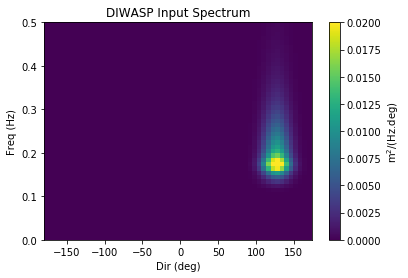

/Users/andrewzulberti/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


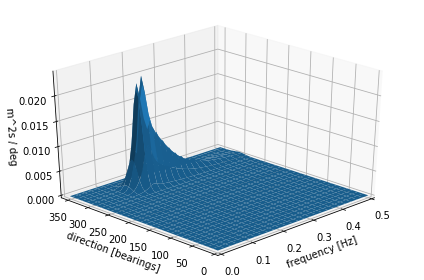

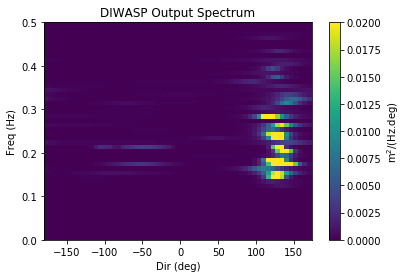

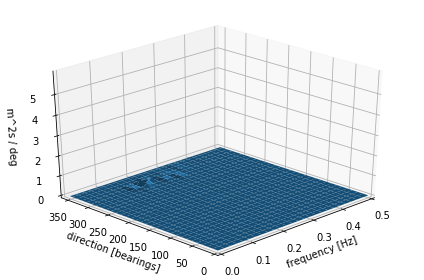

In [12]:
plt.figure()
plt.pcolor(SM['dirs'], SM['freqs'], SM['S'], vmax=0.02)
plt.title('DIWASP Input Spectrum')
plt.ylabel('Freq (Hz)')
plt.xlabel('Dir (deg)')

cb = plt.colorbar()
cb.set_label('m$^2$/(Hz.deg)')
plt.show()

plotspec(SM, 3)

plt.figure()
plt.pcolor(SMout['dirs'], SMout['freqs'], SMout['S'], vmax=0.02)
plt.title('DIWASP Output Spectrum')
plt.ylabel('Freq (Hz)')
plt.xlabel('Dir (deg)')

cb = plt.colorbar()
cb.set_label('m$^2$/(Hz.deg)')

plotspec(SMout, 3)
plt.show()

# TEST pyDIWASP
Now import the data used to make the above spectra and test pyDIWASP

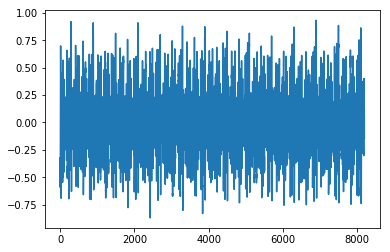

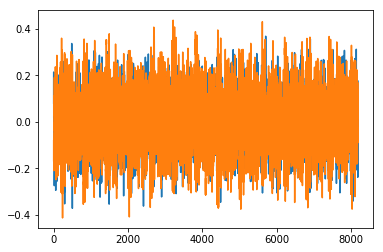

array([[-0.322719,  0.080574, -0.081318],
       [-0.386619,  0.214456, -0.17034 ],
       [-0.39526 ,  0.017481, -0.072341],
       ...,
       [ 0.052726,  0.065595,  0.018437],
       [ 0.010321, -0.015898, -0.089339],
       [-0.144618,  0.175048, -0.028774]])

In [13]:
plt.plot(ID['data'][:, 0])
plt.show()

plt.plot(ID['data'][:, 1:3])
plt.show()
ID['data']

# TRANSFER FUNCTIONS
Got to track these transfer functions. I think I'm interpreting something incorrectly. 


calculating.....

cross power spectra
wavenumbers
transfer parameters

directional spectra using IMLM method
calculating for frequency 1 of 170
calculating for frequency 2 of 170
calculating for frequency 3 of 170
calculating for frequency 4 of 170
calculating for frequency 5 of 170
calculating for frequency 6 of 170
calculating for frequency 7 of 170
calculating for frequency 8 of 170
calculating for frequency 9 of 170
calculating for frequency 10 of 170
calculating for frequency 11 of 170
calculating for frequency 12 of 170
calculating for frequency 13 of 170
calculating for frequency 14 of 170
calculating for frequency 15 of 170
calculating for frequency 16 of 170
calculating for frequency 17 of 170
calculating for frequency 18 of 170
calculating for frequency 19 of 170
calculating for frequency 20 of 170
calculating for frequency 21 of 170
calculating for frequency 22 of 170
calculating for frequency 23 of 170
calculating for frequency 24 of 170
calculating for frequency 25 of 170

/Users/andrewzulberti/Dropbox/University/PhD/03_CODE/Source_code/pyDIWASP/pyDIWASP/interpspec.py:46: UserWarning: User defined grid may be too coarse; try increasing resolution of SM['freqs'] or SM['dirs']
  ' resolution of ''SM[\'freqs\']'' or ''SM[\'dirs\']''')


Infospec::
Significant wave height: 3.408894251825
Peak period: 4.760589932304411
Direction of peak period: 126.0 axis angle / 144.0 compass bearing
Dominant direction: 126.0 axis angle / 144.0 compass bearing
finished...plotting spectrum


/Users/andrewzulberti/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


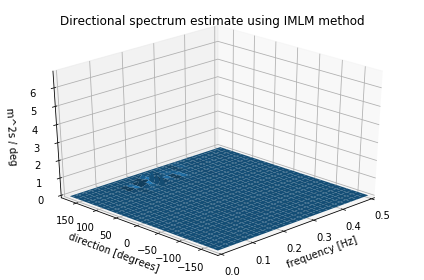

In [15]:
from pyDIWASP.private.check_data import check_data

check_data(ID, 1)
check_data(SM, 2)
check_data(EP, 3)

SM_test = SM.copy()
SM_test.pop('S', None)

SMpy, EPpy = dirspec(ID, SM_test, EP)

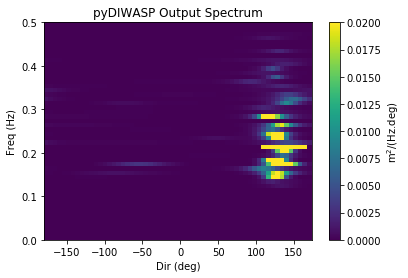

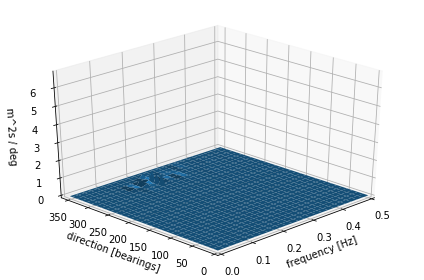

In [16]:
plt.figure()
plt.pcolor(SMpy['dirs'], SMpy['freqs'], np.real(SMpy['S']), vmax=0.02)
plt.title('pyDIWASP Output Spectrum')
plt.ylabel('Freq (Hz)')
plt.xlabel('Dir (deg)')

cb = plt.colorbar()
cb.set_label('m$^2$/(Hz.deg)')

plotspec(SMpy, 3)
plt.show()

# Emilio
Go to understand how each step fits in with the depth transfer functions and how they are transforming the data. Then we test against our spectral code and we're done. 